In [0]:
#Fernando José Sagastume Cerna
#Carnet: 17004989
#Sección: A
#SP
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

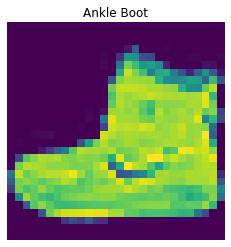

In [0]:
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.axis('off')
plt.show()

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

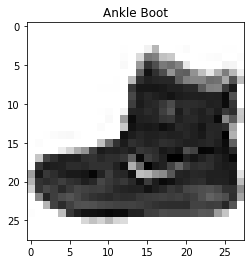

In [0]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.show()

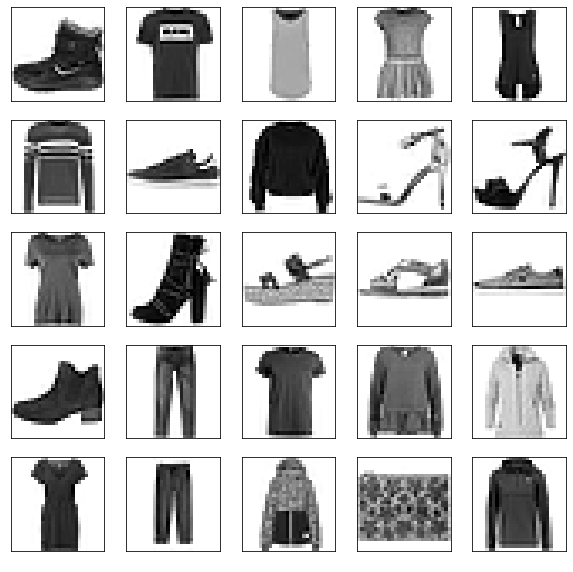

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='w')
#plt.show()

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_images, 
          train_labels, 
          validation_split=0.3,
          epochs=10
          )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 23s 544us/sample - loss: 0.7327 - accuracy: 0.7552 - val_loss: 0.5400 - val_accuracy: 0.8162
Epoch 2/10
42000/42000 [==============================] - 22s 516us/sample - loss: 0.4790 - accuracy: 0.8317 - val_loss: 0.4830 - val_accuracy: 0.8323
Epoch 3/10
42000/42000 [==============================] - 22s 523us/sample - loss: 0.4322 - accuracy: 0.8469 - val_loss: 0.4400 - val_accuracy: 0.8408
Epoch 4/10
42000/42000 [==============================] - 22s 529us/sample - loss: 0.3998 - accuracy: 0.8575 - val_loss: 0.4009 - val_accuracy: 0.8586
Epoch 5/10
42000/42000 [==============================] - 22s 527us/sample - loss: 0.3786 - accuracy: 0.8658 - val_loss: 0.4035 - val_accuracy: 0.8564
Epoch 6/10
42000/42000 [==============================] - 22s 523us/sample - loss: 0.3591 - accuracy: 0.8706 - val_loss: 0.3762 - val_accuracy: 0.8660
Epoch 7/10
42000/42000 [====================

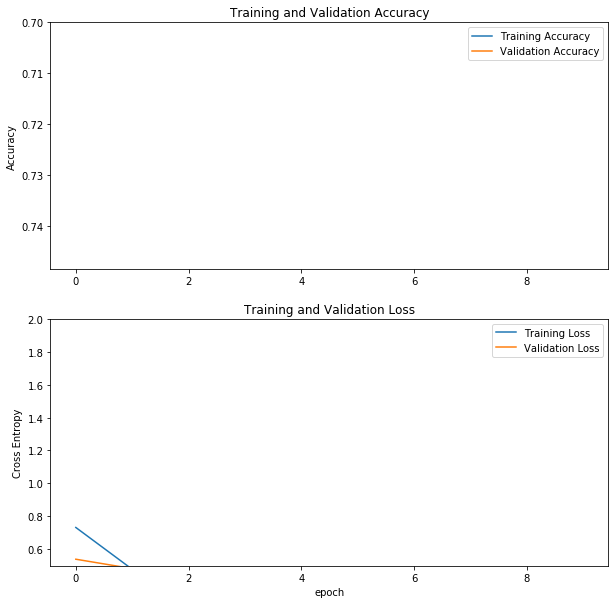

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.7])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.5,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 0.36901114311218264
Accuracy: 0.8673


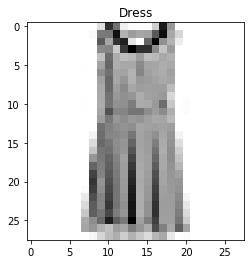


Predicted class is: Dress


In [0]:
img_index = np.random.randint(test_images.shape[0])
img = test_images[img_index]

predictions = model.predict(tf.expand_dims(img, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[img_index]])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])

In [0]:

test_image = tf.keras.utils.get_file('','https://img.favpng.com/9/23/16/t-shirt-clothing-top-life-is-good-company-png-favpng-nwT6T08J4qtBpXhmdzrUwFduU.jpg')
test_image = Image.open(test_image).resize((28,28)).convert('L')
test_image = np.array(test_image)/255.0
predictions = model.predict(tf.expand_dims(test_image, 0))

plt.imshow(test_image, cmap=plt.cm.binary)
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])

IsADirectoryError: ignored